# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))


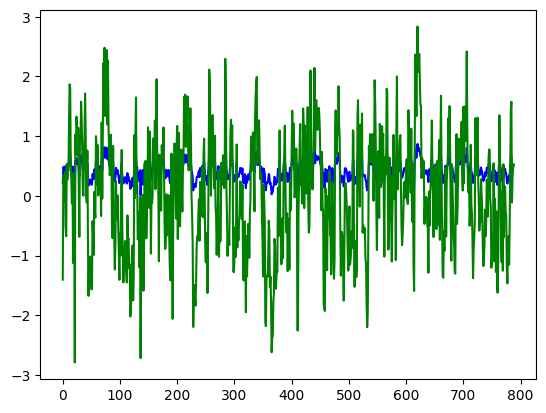

In [3]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Only contemporary week: temperature, precipitation, both

## temperature

### full data

In [4]:
import glob
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'
filenames = glob.glob(path + "/*.csv")

df = []
for file in filenames:
    df.append(pd.read_csv(file))
    
df = pd.concat(df, ignore_index=True)
print(min(df.x),max(df.x),min(df.y),max(df.y))
df

6.649860364384157 12.949860339180924 43.74986055078544 46.54986054189981


date          y         x  year  week  cyclostationary_mean_tg  \
0       2001-01-05  43.749861  12.14986  2001     1                 2.009904   
1       2001-01-05  43.749861  12.24986  2001     1                 2.067019   
2       2001-01-05  43.749861  12.34986  2001     1                 1.852115   
3       2001-01-05  43.749861  12.44986  2001     1                 1.326058   
4       2001-01-05  43.749861  12.54986  2001     1                 0.919712   
...            ...        ...       ...   ...   ...                      ...   
972166  2022-06-24  45.149861   9.94986  2022    25                 2.690385   
972167  2022-06-24  45.149861  10.04986  2022    25                 3.044231   
972168  2022-06-24  45.249861   9.54986  2022    25                 3.776635   
972169  2022-06-24  45.249861   9.84986  2022    25                 3.044519   
972170  2022-06-24  45.249861   9.94986  2022    25                 3.190865   

        cyclostationary_mean_rr  cyclostationary_mean_tg_1w  \
0                      3.832692                    2.009904   
1                      5.870192                    2.067019   
2                      6.747115                    1.852115   
3                      6.315385                    1.326058   
4                      5.876923                    0.919712   
...                         ...                         ...   
972166                -2.800962                    2.272010   
972167                -2.908654                    2.598934   
972168                -1.676923                    3.400022   
972169                -2.306731                    2.604873   
972170                -2.568269                    2.704524   

        cyclostationary_mean_tg_4w  cyclostationary_mean_tg_8w  \
0                         2.009904                    2.009904   
1                         2.067019                    2.067019   
2                         1.852115                    1.852115   
3                         1.326058                    1.326058   
4                         0.919712                    0.919712   
...                            ...                         ...   
972166                    2.329204                    1.385630   
972167                    2.706495                    1.759349   
972168                    3.327979                    2.531039   
972169                    2.643358                    1.767176   
972170                    2.760435                    1.833568   

        cyclostationary_mean_tg_12w  cyclostationary_mean_tg_16w  \
0                          2.009904                     2.009904   
1                          2.067019                     2.067019   
2                          1.852115                     1.852115   
3                          1.326058                     1.326058   
4                          0.919712                     0.919712   
...                             ...                          ...   
972166                     0.870501                     1.147244   
972167                     1.269219                     1.527790   
972168                     1.964117                     2.186415   
972169                     1.255820                     1.511847   
972170                     1.338008                     1.597108   

        cyclostationary_mean_tg_24w  cyclostationary_mean_rr_1w  \
0                          2.009904                    3.832692   
1                          2.067019                    5.870192   
2                          1.852115                    6.747115   
3                          1.326058                    6.315385   
4                          0.919712                    5.876923   
...                             ...                         ...   
972166                     0.936656                   -1.272072   
972167                     1.217671                   -1.620804   
972168                     1.916099                   -0.938462   
972169          

In [5]:
df.columns

Index(['date', 'y', 'x', 'year', 'week', 'cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],
      dtype='object')

In [6]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal,multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

actual training score: 0.14535721368732513
actual validation score: 0.31589361878551847, number of remaining columns: 131

actual training score: 0.15831694051711964
actu

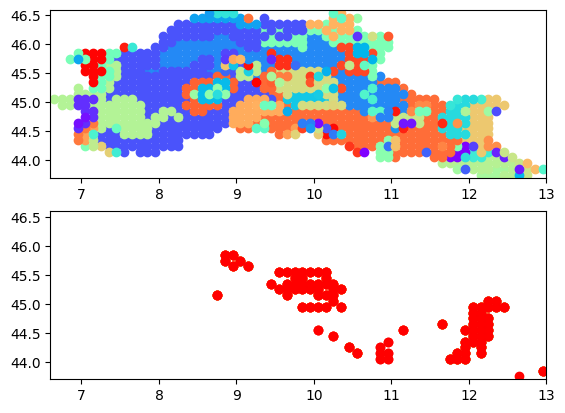

In [7]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

In [8]:
target_df_train

date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]

0
1
2
3
5
9
14
16
17
27
28
29
34
37
42
45
49
50
51
53
55
59
60
63
67
69
70
72
73
74
75
79
88
93
94
95
97
120
Number of features: 38


actual training score: 0.1788179812120797
actual validation score: 0.25991582699231697, number of remaining columns: 36

actual training score: 0.19054891521550266
actual validation score: 0.2741436221315058, number of remaining columns: 35

actual training score: 0.19253828285172447
actual validation score: 0.27940316459897585, number of remaining columns: 34

actual training score: 0.19363950085129134
actual validation score: 0.2835887564591596, number of remaining columns: 33

actual training score: 0.19918379817996423
actual validation score: 0.2899616179009007, number of remaining columns: 32

actual training score: 0.20465642404038142
actual validation score: 0.295204906370229, number of remaining columns: 31

actual training score: 0.20691415757683462
actual validation score: 0.30006870506126104, number of remaining columns: 30

actual training sc

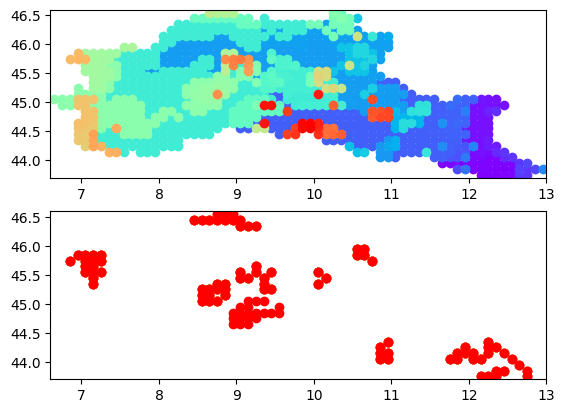

In [10]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)
        
print(f'Number of features: {aggregate_trainVal.iloc[:,ii].shape[1]}\n\n')

selected_colnames_3 = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 35)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3)

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.30036888253707417, test score: 0.003924128902192847
Aggregate regression train score with FS: 0.21751561003556252, test score: -0.05880863218924692
Full aggregate regression train score: 0.30036888253707417, test score: 0.003924128902192847
Aggregate regression train score with FS: 0.23407335740413604, test score: -0.08709933079466414


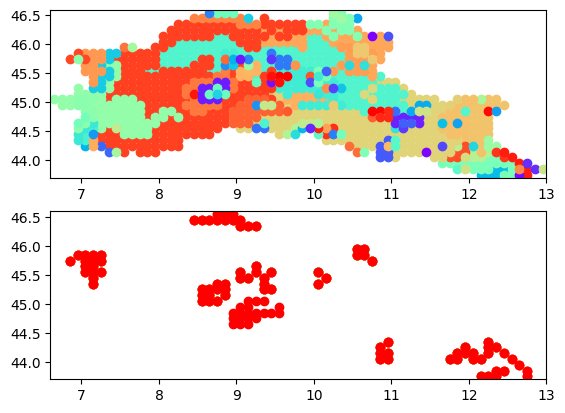

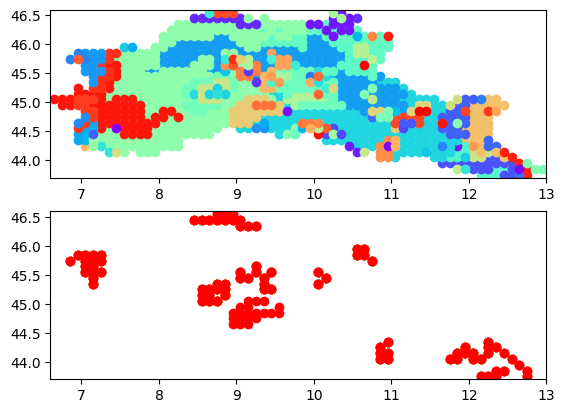

In [20]:
### forcing a low number of features
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3[0:5])

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3[0:10])

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### not considering last years

In [8]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

actual training score: 0.13353229126954447
actual validation score: 0.2120356125416959, number of remaining columns: 152

actual training score: 0.151082857949298
actual 

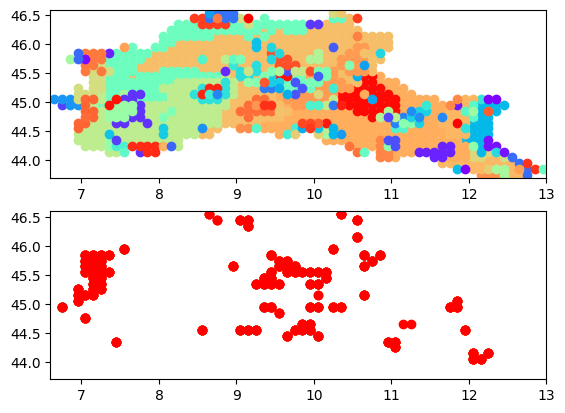

In [9]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.5532918006984423, test score: -0.42495462116789384
Aggregate regression train score with FS: 0.2324647941725212, test score: 0.11054693592955445
Full aggregate regression train score: 0.5532918006984423, test score: -0.42495462116789384
Aggregate regression train score with FS: 0.26409043388139175, test score: 0.046062766439747715


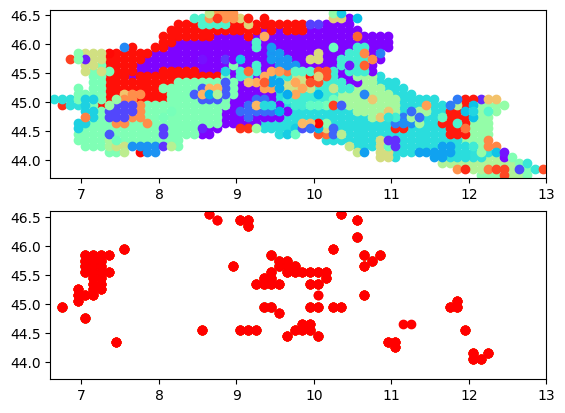

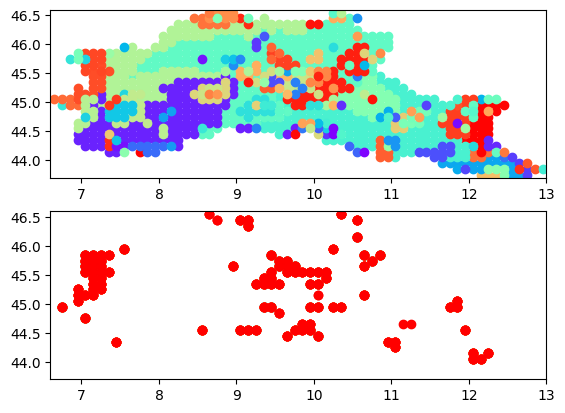

In [27]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### repeat both with CMI FS

In [28]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal,multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

----- MI Scores -----
[(65, 0.14093398314237146), (116, 0.13369491633190958), (53, 0.1315120231757229), (59, 0.13102456207150906), (67, 0.12768733641285576), (103, 0.1272

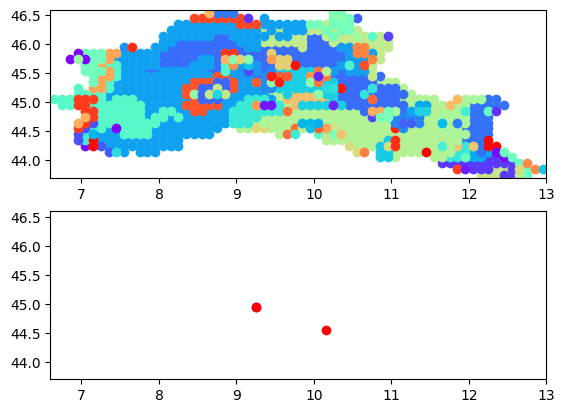

In [29]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

In [31]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

----- MI Scores -----
[(73, 0.14254955357731547), (61, 0.14213477079075912), (108, 0.1377844018351225), (55, 0.13685162638816048), (109, 0.13370736679082068), (32, 0.1334

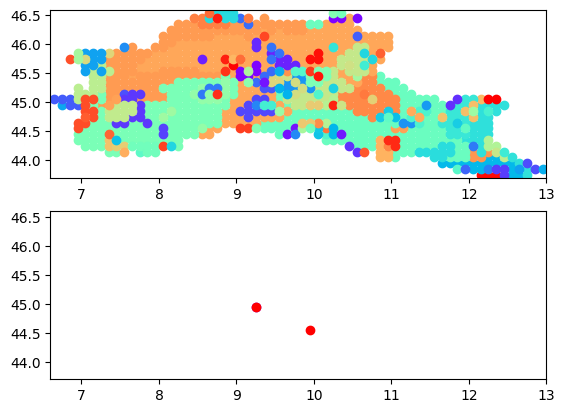

In [32]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

0
1
2
3
6
8
13
17
18
24
28
30
31
32
35
41
48
51
52
55
56
59
60
61
65
70
72
74
80
81
82
83
84
86
90
91
102
104
110
116
Number of features: 40


----- MI Scores -----
[(23, 0.14213477079075912), (19, 0.13685162638816048), (13, 0.1334036301074694), (24, 0.12464026304523891), (27, 0.1127388441226296), (15, 0.11165296291164822), (33, 0.11004692370223715), (11, 0.10951676783052859), (39, 0.10901614815575042), (17, 0.10887819273499635), (25, 0.1075176501645943), (10, 0.10708933782129003), (7, 0.10273022536712494), (29, 0.10217773496127439), (36, 0.10206696542512059), (38, 0.10060621275742238), (12, 0.1000150896823334), (22, 0.09940808948104715), (18, 0.09891722208340499), (34, 0.09517559671524525), (20, 0.09405970185774669), (37, 0.09310461135464691), (1, 0.08813629178680966), (26, 0.08796368006117511), (14, 0.08769531101594863), (16, 0.0866371566109605), (30, 0.08541225590904673), (2, 0.08255332938093998), (28, 0.0818747118544332), (21, 0.08174016674422133), (32, 0.08148653418470819), (9, 0.

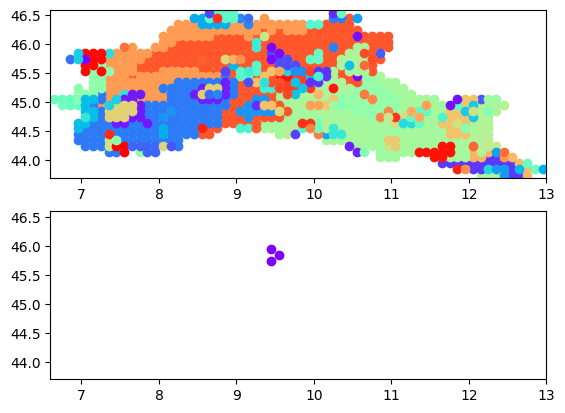

In [35]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)
        
print(f'Number of features: {aggregate_trainVal.iloc[:,ii].shape[1]}\n\n')

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames_3 = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3)

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


## precipitation

### full data

In [36]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal,multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 73

actual training score: 0.0791778524815836
actual validation score: 0.07852889252216644, number of remaining columns: 71

actual training score: 0.08248429499312149
actual 

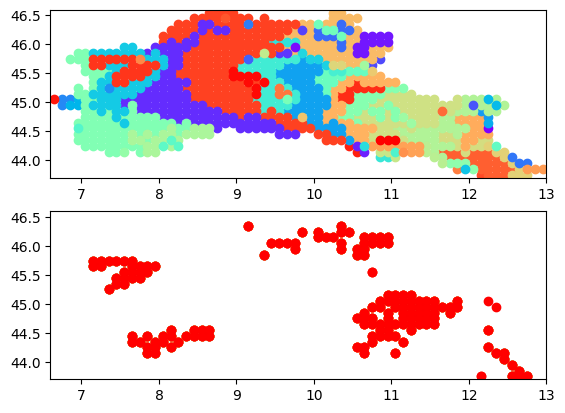

In [37]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

1
2
3
5
6
11
12
14
15
18
21
22
23
24
25
27
28
29
32
39
42
44
45
47
48
51
52
53
54
55
56
58
59
61
67
68
Number of features: 36


actual training score: 0.0745840848885041
actual validation score: 0.07342397941110157, number of remaining columns: 34

actual training score: 0.07609386488735648
actual validation score: 0.07864688188331304, number of remaining columns: 33

actual training score: 0.0763540790120597
actual validation score: 0.08321271921749351, number of remaining columns: 32

actual training score: 0.09039632616636228
actual validation score: 0.08540750951718279, number of remaining columns: 31

actual training score: 0.09180961937387688
actual validation score: 0.09431981178331628, number of remaining columns: 30

actual training score: 0.0919646756354
actual validation score: 0.09598594754820755, number of remaining columns: 29

actual training score: 0.09210104845568112
actual validation score: 0.09555505988830304, number of remaining columns: 28

actual training score: 0

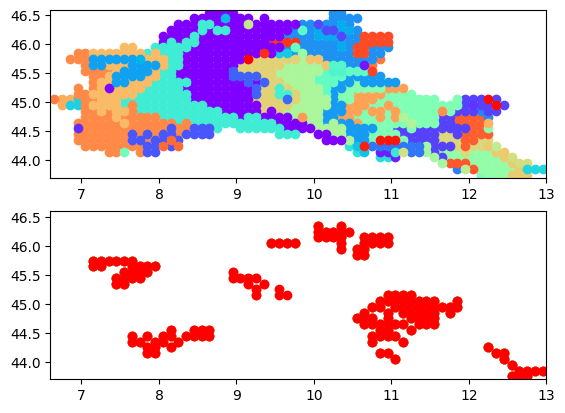

In [38]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)
        
print(f'Number of features: {aggregate_trainVal.iloc[:,ii].shape[1]}\n\n')

selected_colnames_3 = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 35)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3)

plot_cells(output,selected_colnames_3, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.20838904292041882, test score: -0.05758769074679271
Aggregate regression train score with FS: 0.0947041098384186, test score: 0.13144624412054784
Full aggregate regression train score: 0.20838904292041882, test score: -0.05758769074679271
Aggregate regression train score with FS: 0.10423870632505483, test score: 0.11468528728254168


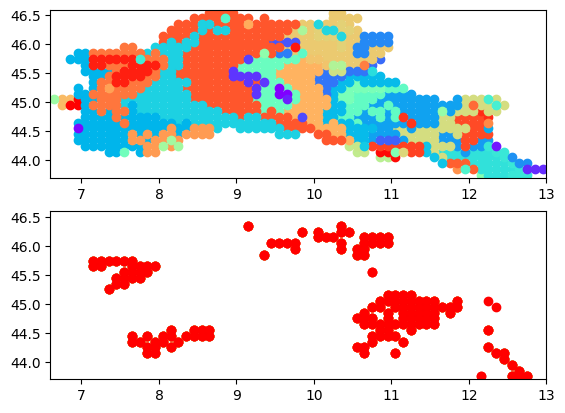

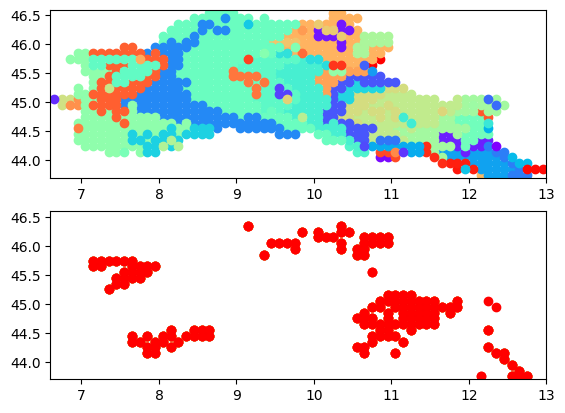

In [39]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### not considering last years

In [40]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 73

actual training score: 0.073267709881499
actual validation score: 0.0067712837720284025, number of remaining columns: 71

actual training score: 0.07503167898441665
actual

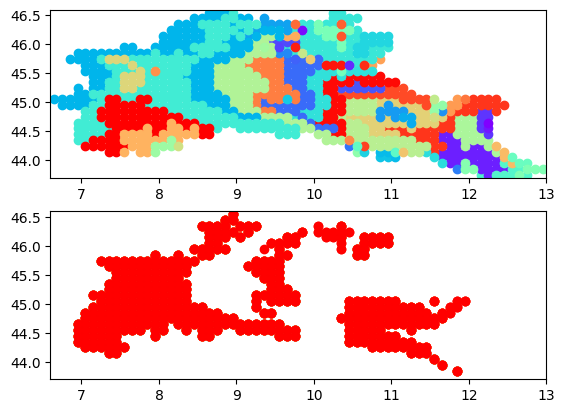

In [41]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.24472586343086233, test score: -0.2155525762161845
Aggregate regression train score with FS: 0.098712719007642, test score: 0.025227234094443052
Full aggregate regression train score: 0.24472586343086233, test score: -0.2155525762161845
Aggregate regression train score with FS: 0.10950057077759368, test score: -0.037070812229788475


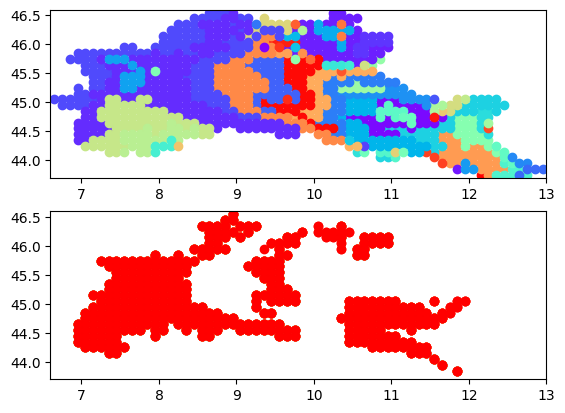

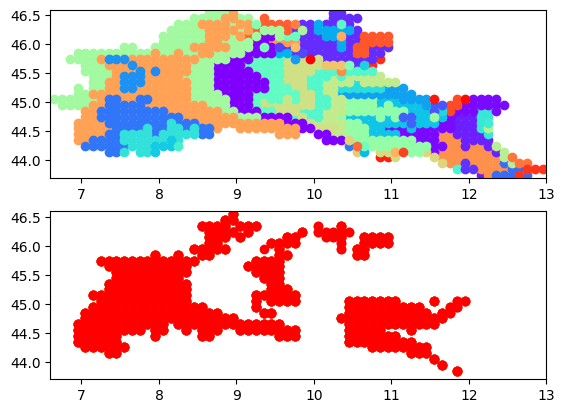

In [42]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### repeat both with CMI FS

In [43]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal,multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 73

----- MI Scores -----
[(22, 0.08536317579374685), (12, 0.07301053267792824), (15, 0.06799557451969171), (21, 0.06782700784737576), (31, 0.06613354386804646), (25, 0.062165

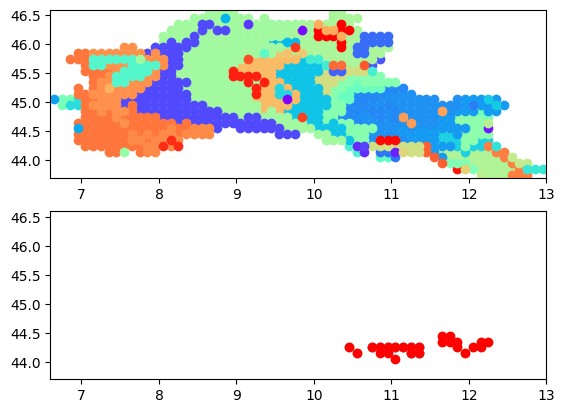

In [44]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

In [45]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 73

----- MI Scores -----
[(15, 0.07944619674144797), (69, 0.07919816591699666), (32, 0.07897283385814786), (16, 0.07845259561980408), (10, 0.07373359985016323), (71, 0.073265

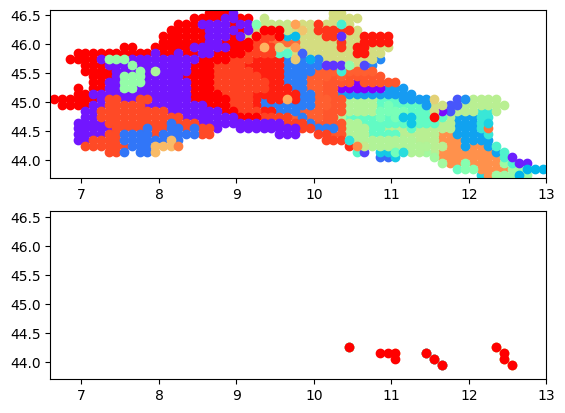

In [46]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

## both

### full data

In [48]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal,multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 73

actual training score: 0.14535721368732524
actual validation score: 0.31589361878551825, number of remaining c

In [51]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)
        
print(f'Number of features: {aggregate_trainVal.iloc[:,ii].shape[1]}\n\n')

selected_colnames_3 = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 35)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames_3)


1
2
3
5
6
11
12
14
15
18
21
22
23
24
25
27
28
29
32
39
42
44
45
47
48
51
52
53
54
55
56
58
59
61
67
68
Number of features: 36


actual training score: 0.17319018643210082
actual validation score: 0.2823993950116579, number of remaining columns: 34

actual training score: 0.17474198529969642
actual validation score: 0.2851484671872959, number of remaining columns: 33

actual training score: 0.18860353978884314
actual validation score: 0.2965395203443135, number of remaining columns: 32

actual training score: 0.1909885469324708
actual validation score: 0.30447061387396945, number of remaining columns: 31

actual training score: 0.19707896369077282
actual validation score: 0.31817130456198006, number of remaining columns: 30

actual training score: 0.19771536669889578
actual validation score: 0.32452438145604345, number of remaining columns: 29

actual training score: 0.1983281056979832
actual validation score: 0.3293596051662582, number of remaining columns: 28

actual training score: 0

In [53]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])



Full aggregate regression train score: 0.5470238348197174, test score: -0.5661913652111861
Aggregate regression train score with FS: 0.2193472509483837, test score: -0.07950543074967054
Full aggregate regression train score: 0.5470238348197174, test score: -0.5661913652111861
Aggregate regression train score with FS: 0.249755382118371, test score: -0.06155155818560076


### not considering last years

In [54]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

Number of features: 991

Number of aggregated features: 73

actual training score: 0.13353229126954447
actual validation score: 0.2120356125416959, number of remaining co

In [55]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])



Full aggregate regression train score: 0.6192496569834187, test score: -0.7363380166831368
Aggregate regression train score with FS: 0.2324647941725212, test score: 0.11054693592955445
Full aggregate regression train score: 0.6192496569834187, test score: -0.7363380166831368
Aggregate regression train score with FS: 0.26409043388139175, test score: 0.046062766439747715


### repeat both with CMI FS

In [56]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal,multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 133

Number of features: 991

Number of aggregated features: 73

----- MI Scores -----
[(65, 0.14093398314237146), (116, 0.13369491633190958), (53, 0.1315120231757229), (59, 0

CMI: 0.0011635506739166301
CMI: 0.013449433090647667
CMI: 0.03077580310744954
CMI: 0.017849382463884844
CMI: 0.021312585836284592
CMI: 0.0029366236117167044
CMI: 0.003329813171706386
CMI: 0.004531491128211329
CMI: 0.0008946529580883267
CMI: 0.013531621486327416
CMI: 0.008593692740563263
CMI: 0.0031197472148428163
CMI: 0.020003587411035112
CMI: 0.003247255707617386
CMI: 0.017771918651745156
CMI: 0.02872974694969671
CMI: 0.0022374653222313468
CMI: 0.019485754982492887
CMI: 0.024312409349081437
CMI: 0.025828436111608843
CMI: 0.024495326983346777
CMI: 0.004219668786390129
CMI: 0.020156383250556242
CMI: 0.006465405137292185
CMI: 0.011047832780446187
CMI: 0.01431761405827875
CMI: 0.015715504579808554
CMI: 0.029605117461256047
CMI: 0.002628639428014057
CMI: 0.005078415370161543
CMI: 0.002267608269936744
CMI: 0.010631251111295176
CMI: 0.028322282613494343
CMI: 0.027568458897693188
CMI: 0.011381994003182933
CMI: 0.0006146284228726595
CMI: 6.733077623591321e-05
CMI: 0.004262108872573833
CMI: 0.0

In [57]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 154

Number of features: 991

Number of aggregated features: 73

----- MI Scores -----
[(73, 0.14254955357731547), (61, 0.14213477079075912), (108, 0.1377844018351225), (55, 0

CMI: 0.011688669929711515
CMI: 0.02268860435351977
CMI: 0.018923089693516748
CMI: 0.008224622973404955
CMI: 0.004845012734537191
CMI: 0.008218322583010751
CMI: 0.004807900532607795
CMI: 0.0017065433893719006
CMI: 0.02017542375927142
CMI: 0.005552479872308086
CMI: 0.028621039845033586
CMI: 0.006966706524326544
CMI: 0.004222610334991744
CMI: 0.0021242303363041837
CMI: 0.03849797404114014
CMI: 0.00978832127370563
CMI: 0.030188300780909505
CMI: 0.0019558158947793614
CMI: 0.011318510128873999
CMI: 2.6576647397968944e-05
CMI: 0.0021597939584014347
CMI: 0.011731939185381263
CMI: 0.01155506185842231
CMI: 0.008388513987551555
CMI: 0.0007617959919094808
CMI: 0.0034798107300405
CMI: 0.006629353587670389
CMI: 0.024219769771379684
CMI: 0.011624887683443719
CMI: 0.0038788429123247092
CMI: 0.0005194979022218327
CMI: 0.00045309487052866415
CMI: 0.0018357488292763957
CMI: 0.005416917223382223
CMI: 0.000528583588673387
CMI: 0.00013030848320716437
CMI: 0.0033595155703496915
CMI: 0.01451611133261696
CMI: 

# 

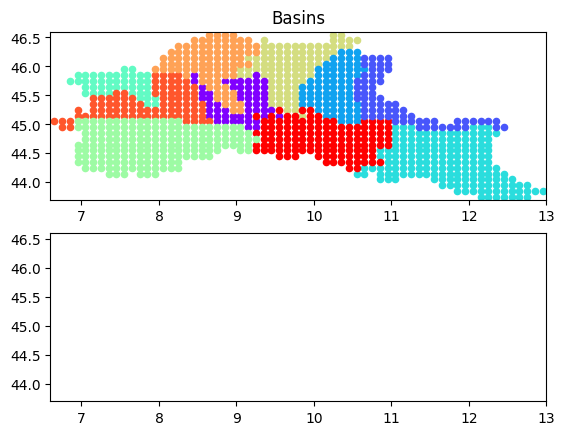

In [6]:
names = ['Adda_aggreg.csv','Lambro_Olona_aggreg.csv','Dora_aggreg.csv','Oglio_Iseo_aggreg.csv',
         'Emiliani1_aggreg.csv','Piemonte_Nord_aggreg.csv','Emiliani2_aggreg.csv','Piemonte_Sud_aggreg.csv',
         'Garda_Mincio_aggreg.csv','Ticino_aggreg.csv']
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/'
import glob,os
xmin=6.6
xmax=13
ymin=43.7
ymax=46.6
colors = cm.rainbow(np.linspace(0,1,10))
np.random.shuffle(colors)
fig, ax = plt.subplots(2)
ax[0].set_xlim(xmin,xmax)
ax[1].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
ax[1].set_ylim(ymin,ymax)
ax[0].set_title("Basins")
for i in range(10):
    x=[]
    y=[]
    path_file = path+names[i]
    df = pd.read_csv(path_file)
    vals = df.groupby(['x','y']).count().index.values
    for j in range(len(vals)):
        x.append(vals[j][0])
        y.append(vals[j][1])
    ax[0].scatter(x,y,color=colors[i], s=20)

In [10]:
output

[['mean_12.149860342381333_43.74986055078544',
  'mean_12.249860341981282_43.74986055078544',
  'mean_12.34986034158123_43.74986055078544'],
 ['mean_12.149860342381333_43.8498605504681',
  'mean_12.149860342381333_43.94986055015075',
  'mean_12.249860341981282_43.94986055015075',
  'mean_12.049860342781384_43.8498605504681',
  'mean_12.049860342781384_43.94986055015075',
  'mean_12.34986034158123_43.94986055015075',
  'mean_12.34986034158123_44.04986054983341',
  'mean_11.949860343181436_43.94986055015075',
  'mean_12.44986034118118_43.94986055015075',
  'mean_11.849860343581486_43.94986055015075',
  'mean_12.549860340781128_43.94986055015075',
  'mean_11.749860343981538_43.94986055015075',
  'mean_11.64986034438159_43.94986055015075',
  'mean_12.249860341981282_44.04986054983341',
  'mean_12.549860340781128_43.8498605504681',
  'mean_12.549860340781128_43.74986055078544',
  'mean_12.649860340381077_43.74986055078544'],
 ['mean_12.149860342381333_44.04986054983341',
  'mean_12.24986034

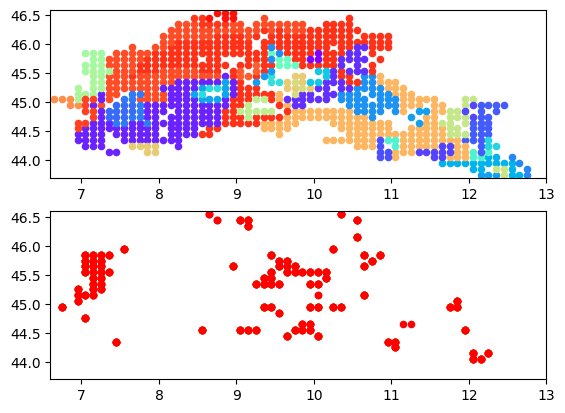

In [25]:
x = []
y = []
xmin=6.6
xmax=13
ymin=43.7
ymax=46.6
colors = cm.rainbow(np.linspace(0,1,len(output)))
np.random.shuffle(colors)
fig, ax = plt.subplots(2)
ax[0].set_xlim(xmin,xmax)
ax[1].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
ax[1].set_ylim(ymin,ymax)
list_outputs = []
for i in range(len(output)): 
    #print(len(output[i]))
    x = []
    y = []
    
    for datum in output[i]:
        x.append(float(datum.split('_')[1]))
        y.append(float(datum.split('_')[2]))
    if len(x)>=3: 
        ax[0].scatter(x,y,color=colors[i],s=20)
        list_outputs.append(list(zip(x,y)))
    
x = []
y = []
col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
for i in range(len(selected_colnames)): 
    idx = int(selected_colnames[i].split('_')[-1])
    for datum in output[idx]:
        x.append(float(datum.split('_')[1]))
        y.append(float(datum.split('_')[2]))
    ax[1].scatter(x,y,color=col[i],s=20)
    

In [35]:
import pickle
with open('output_for_plot.pkl', 'wb') as f:
    pickle.dump(list_outputs, f)

In [37]:
list_outputs[0]

[(12.149860342381333, 43.74986055078544),
 (12.249860341981282, 43.74986055078544),
 (12.34986034158123, 43.74986055078544)]

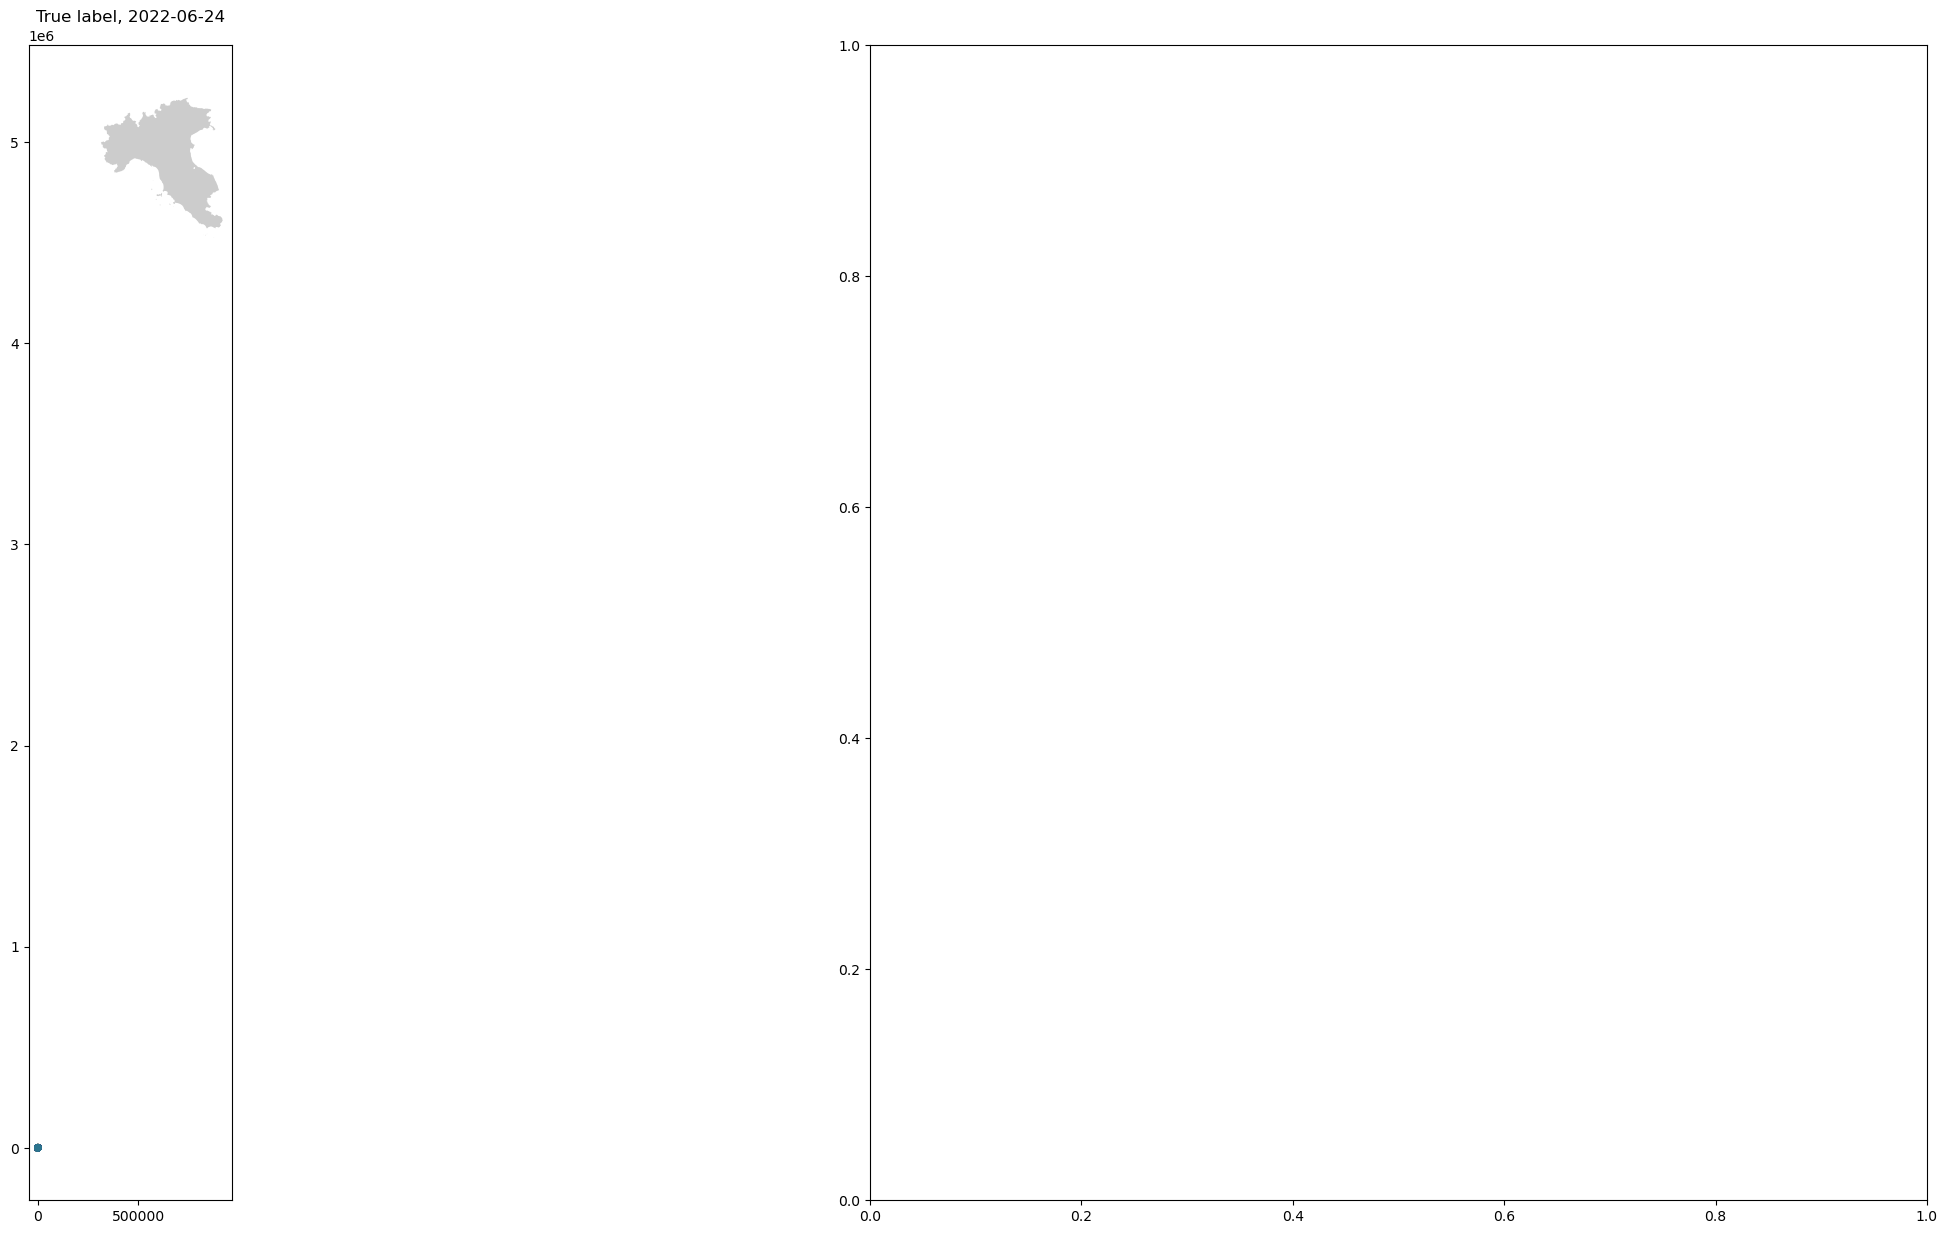

In [11]:
#import netCDF4 as nc
import pandas as pd
#import pandasql as ps
#import xarray as xr
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

#import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon
import numpy as np
import glob

pd.set_option('display.max_rows', 173)

shapeWorld = gpd.read_file('/Users/paolo/Downloads/norditaly/norditaly.shp')

data1 = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Adda_aggreg.csv')

data1 = data1.reset_index()

data1 = data1.loc[:,['date','x','y','cyclostationary_mean_tg']]
    
dt = '2022-06-24'

data1 = data1.loc[data1.date==dt].dropna()
  
crs = {'init' : 'EPSG:4326'}

geometry_mi = [Point(xy) for xy in zip(data1['x'], data1['y'])]
geometry_mi[:3]

features_gdf1 = gpd.GeoDataFrame(data1,geometry=geometry_mi) # ,crs=crs

fig,ax = plt.subplots(1,2,figsize=(30,15))

shapeWorld.plot(ax=ax[0],alpha=0.4,color='grey')
features_gdf1.plot(ax=ax[0],markersize=20,marker='o',label='lsm',column='cyclostationary_mean_tg', vmin=2, vmax=5)
ax[0].set_title('True label, '+str(dt))

plt.show()


3.549038382211272
5.780961409246979


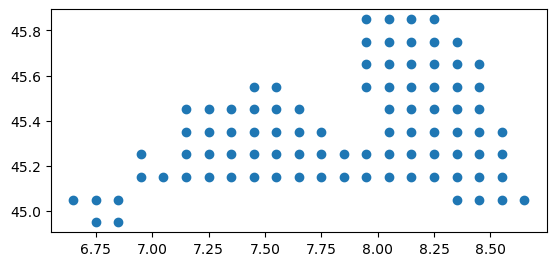

In [26]:
#!pip install geocube
names = ['Adda_aggreg.csv','Lambro_Olona_aggreg.csv','Dora_aggreg.csv','Oglio_Iseo_aggreg.csv',
         'Emiliani1_aggreg.csv','Piemonte_Nord_aggreg.csv','Emiliani2_aggreg.csv','Piemonte_Sud_aggreg.csv',
         'Garda_Mincio_aggreg.csv','Ticino_aggreg.csv']
for name in ['Piemonte_Nord_aggreg.csv']:
    data1 = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/'+str(name))
    
    data1 = data1.reset_index()
    
    data1 = data1.loc[:,['date','x','y','cyclostationary_mean_tg']]
        
    dt = '2022-06-24'
    
    data1 = data1.loc[data1.date==dt].dropna()
    
    plot_df = pd.DataFrame({
        'ID': data1.cyclostationary_mean_tg,
        'Latitude': data1.y,
        'Longitude': data1.x
    })
    
    import geopandas as gpd
    from geocube.api.core import make_geocube
    
    df_for_tif = plot_df.groupby(['Latitude', 'Longitude']).first()
    df_for_tif.reset_index(inplace = True)
    
    gdf = gpd.GeoDataFrame(
        df_for_tif,
        geometry=gpd.points_from_xy(df_for_tif.Longitude, df_for_tif.Latitude)
    )
    
    gdf.plot()
    print(min(gdf.ID))
    print(max(gdf.ID))
    
    out_grd = make_geocube(
        vector_data=gdf,
        measurements=["ID"],
        resolution=(-0.05, 0.05)
    )
    
    #out_grd["ID"].rio.to_raster(str(name)+"_sample.tif")

In [27]:
data1

date        x          y  cyclostationary_mean_tg
87220  2022-06-24  6.74986  44.949861                 4.592500
87221  2022-06-24  6.84986  44.949861                 4.647788
87222  2022-06-24  6.64986  45.049861                 4.836827
87223  2022-06-24  6.74986  45.049861                 4.936058
87224  2022-06-24  6.84986  45.049861                 4.947404
87225  2022-06-24  8.34986  45.049861                 4.340673
87226  2022-06-24  8.44986  45.049861                 4.331250
87227  2022-06-24  8.54986  45.049861                 4.381827
87228  2022-06-24  8.64986  45.049861                 4.434519
87229  2022-06-24  6.94986  45.149861                 5.111923
87230  2022-06-24  7.04986  45.149861                 4.626731
87231  2022-06-24  7.14986  45.149861                 4.521250
87232  2022-06-24  7.24986  45.149861                 4.461538
87233  2022-06-24  7.34986  45.149861                 4.216250
87234  2022-06-24  7.44986  45.149861                 4.030385
87235  2022-06-24  7.54986  45.149861                 4.062885
87236  2022-06-24  7.64986  45.149861                 3.955961
87237  2022-06-24  7.74986  45.149861                 4.023558
87238  2022-06-24  7.84986  45.149861                 4.022596
87239  2022-06-24  7.94986  45.149861                 4.088558
87240  2022-06-24  8.04986  45.149861                 4.147692
87241  2022-06-24  8.14986  45.149861                 4.125096
87242  2022-06-24  8.24986  45.149861                 4.197692
87243  2022-06-24  8.34986  45.149861                 4.278269
87244  2022-06-24  8.44986  45.149861                 4.291827
87245  2022-06-24  8.54986  45.149861                 4.335865
87246  2022-06-24  6.94986  45.249861                 5.553942
87247  2022-06-24  7.14986  45.249861                 5.398846
87248  2022-06-24  7.24986  45.249861                 4.824038
87249  2022-06-24  7.34986  45.249861                 4.339327
87250  2022-06-24  7.44986  45.249861                 3.954808
87251  2022-06-24  7.54986  45.249861                 3.875000
87252  2022-06-24  7.64986  45.249861                 3.957788
87253  2022-06-24  7.74986  45.249861                 3.941250
87254  2022-06-24  7.84986  45.249861                 3.950481
87255  2022-06-24  7.94986  45.249861                 4.022404
87256  2022-06-24  8.04986  45.249861                 4.028654
87257  2022-06-24  8.14986  45.249861                 4.172019
87258  2022-06-24  8.24986  45.249861                 4.181827
87259  2022-06-24  8.34986  45.249861                 4.184038
87260  2022-06-24  8.44986  45.249861                 4.252981
87261  2022-06-24  8.54986  45.249861                 4.256731
87262  2022-06-24  7.14986  45.349861                 5.569615
87263  2022-06-24  7.24986  45.349861                 4.824615
87264  2022-06-24  7.34986  45.349861                 4.468173
87265  2022-06-24  7.44986  45.349861                 4.272500
87266  2022-06-24  7.54986  45.349861                 3.869038
87267  2022-06-24  7.64986  45.349861                 3.837981
87268  2022-06-24  7.74986  45.349861                 3.840192
87269  2022-06-24  8.04986  45.349861                 4.003942
87270  2022-06-24  8.14986  45.349861                 4.034038
87271  2022-06-24  8.24986  45.349861                 4.142404
87272  2022-06-24  8.34986  45.349861                 4.190192
87273  2022-06-24  8.44986  45.349861                 4.216635
87274  2022-06-24  8.54986  45.349861                 4.260673
87275  2022-06-24  7.14986  45.449861                 5.780961
87276  2022-06-24  7.24986  45.449861                 5.295577
87277  2022-06-24  7.34986  45.449861                 4.574615
87278  2022-06-24  7.44986  45.449861                 4.283269
87279  2022-06-24  7.54986  45.449861                 3.935481
87280  2022-06-24  7.64986  45.449861                 3.915769
87281  2022-06-24  8.04986  45.449861                 3.923942
87282  2022-06-24  8.14986  45.449861       

In [20]:
gdf

Latitude  Longitude        ID                   geometry
0   45.149861    9.84986  2.972596   POINT (9.84986 45.14986)
1   45.249861    9.64986  3.389808   POINT (9.64986 45.24986)
2   45.249861    9.74986  3.128077   POINT (9.74986 45.24986)
3   45.349861    9.44986  4.382500   POINT (9.44986 45.34986)
4   45.349861    9.54986  4.030000   POINT (9.54986 45.34986)
5   45.349861    9.64986  3.055000   POINT (9.64986 45.34986)
6   45.349861    9.74986  2.928269   POINT (9.74986 45.34986)
7   45.449861    9.44986  4.693654   POINT (9.44986 45.44986)
8   45.449861    9.54986  4.775000   POINT (9.54986 45.44986)
9   45.449861    9.64986  4.854231   POINT (9.64986 45.44986)
10  45.449861    9.74986  3.933269   POINT (9.74986 45.44986)
11  45.549861    9.44986  4.282981   POINT (9.44986 45.54986)
12  45.549861    9.54986  4.413077   POINT (9.54986 45.54986)
13  45.549861    9.64986  4.336827   POINT (9.64986 45.54986)
14  45.549861    9.74986  3.981058   POINT (9.74986 45.54986)
15  45.649861    9.44986  3.712500   POINT (9.44986 45.64986)
16  45.649861    9.54986  3.652885   POINT (9.54986 45.64986)
17  45.649861    9.64986  3.439135   POINT (9.64986 45.64986)
18  45.649861    9.74986  3.234038   POINT (9.74986 45.64986)
19  45.749861    9.44986  3.439519   POINT (9.44986 45.74986)
20  45.749861    9.54986  3.575961   POINT (9.54986 45.74986)
21  45.749861    9.64986  3.565673   POINT (9.64986 45.74986)
22  45.749861    9.74986  3.887596   POINT (9.74986 45.74986)
23  45.749861    9.84986  3.751058   POINT (9.84986 45.74986)
24  45.849861    9.04986  3.004711   POINT (9.04986 45.84986)
25  45.849861    9.14986  3.250385   POINT (9.14986 45.84986)
26  45.849861    9.34986  3.284711   POINT (9.34986 45.84986)
27  45.849861    9.44986  3.356442   POINT (9.44986 45.84986)
28  45.849861    9.54986  3.724231   POINT (9.54986 45.84986)
29  45.849861    9.64986  4.301250   POINT (9.64986 45.84986)
30  45.849861    9.74986  3.959519   POINT (9.74986 45.84986)
31  45.849861    9.84986  4.046154   POINT (9.84986 45.84986)
32  45.849861    9.94986  3.701154   POINT (9.94986 45.84986)
33  45.949861    9.04986  2.951346   POINT (9.04986 45.94986)
34  45.949861    9.14986  3.308846   POINT (9.14986 45.94986)
35  45.949861    9.24986  3.581923   POINT (9.24986 45.94986)
36  45.949861    9.34986  3.325000   POINT (9.34986 45.94986)
37  45.949861    9.44986  3.205865   POINT (9.44986 45.94986)
38  45.949861    9.54986  3.032981   POINT (9.54986 45.94986)
39  45.949861    9.64986  3.844615   POINT (9.64986 45.94986)
40  45.949861    9.74986  3.113461   POINT (9.74986 45.94986)
41  45.949861    9.84986  2.773077   POINT (9.84986 45.94986)
42  45.949861    9.94986  3.664904   POINT (9.94986 45.94986)
43  46.049861    9.24986  3.257500   POINT (9.24986 46.04986)
44  46.049861    9.34986  3.269711   POINT (9.34986 46.04986)
45  46.049861    9.44986  2.833942   POINT (9.44986 46.04986)
46  46.049861    9.54986  2.845481   POINT (9.54986 46.04986)
47  46.049861    9.64986  2.756442   POINT (9.64986 46.04986)
48  46.049861    9.74986  2.580769   POINT (9.74986 46.04986)
49  46.049861    9.84986  2.771154   POINT (9.84986 46.04986)
50  46.049861    9.94986  3.031923   POINT (9.94986 46.04986)
51  46.049861   10.04986  2.857308  POINT (10.04986 46.04986)
52  46.149861    9.14986  2.407692   POINT (9.14986 46.14986)
53  46.149861    9.24986  2.795192   POINT (9.24986 46.14986)
54  46.149861    9.34986  3.177404   POINT (9.34986 46.14986)
55  46.149861    9.44986  3.378461   POINT (9.44986 46.14986)
56  46.149861    9.54986  3.238558   POINT (9.54986 46.14986)
57  46.149861    9.64986  3.765000   POINT (9.64986 46.14986)
58  46.149861    9.74986  3.847308   POINT (9.74986 46.14986)
59  46.149861    9.84986  3.422211   POINT (9.84986 46.14986)
60  46.149861    9.94986  3.066538   POINT (9.94986 46.14986)
61  46.149861   10.04986  3.087596  POINT (10.04986 46.14986)
62  46.149861   10.14986  3.026635  POINT (10.14986 46.14986)
63  46.249861    9.34986  2.735769   

# 

## Emiliani 2, contemporary week:
## tests:
full data: max_train='2013-11-22', max_val='2018-04-10', max_test='2022-06-24'<br>
without last years: max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01'<br>
<br>
### temperature:
991 original features --> 133 aggregations with neighbours --> 25 wrapper FS<br>
train score:0.283, validation score: 0.43, test score: -0.16<br>
<br>
Without last years: 154 aggregations with neighbours --> 41 wrapper FS<br>
train score:0.553, validation score: 0.45, test score: 0.23<br>

### precipitation:
130 original features --> 24 aggregations with neighbours --> 5 wrapper FS<br>
train score:0.066, validation score: 0.039, test score: 0.065<br>
<br>
Without last years: 28 aggregations with neighbours --> 5 wrapper FS<br>
train score:0.0727, validation score: 0.010, test score: 0.058<br>

### both:
130+130 original features --> 42+24 aggregations with neighbours --> 24 wrapper FS<br>
train score:0.2358, validation score: 0.329, test score: 0.019<br>
<br>
Without last years: 41+28 aggregations with neighbours --> 29 wrapper FS<br>
train score:0.264, validation score: 0.29, test score: 0.186<br>
